<h3>Data loading, preparation and cleaning</h2>

In [85]:
import pandas as pd

file_dir = "../data/"
file_name = "positions_Python_11-09-2024.csv"
file_path = file_dir + file_name
df = pd.read_csv(file_path)

df.head()

,Position,Experience,Company,Location,Date,Details
0,Стажер Python Developer для УНКД,below year,"ГО ""УНКД""",віддалено,19 серпня,"УНКД — це унікальний проект, що живе питанням..."
1,Python Developer у Стартап,below year,ESUPPORT,NaN,19 серпня,Компанія ESUPPORT спеціалізується на B2B лідог...
2,Python Developer,from 3 to 5 years,Requestum,віддалено,11 вересня,Requestum company is looking for a talented S...
3,Middle Python Engineer,from 1 to 3 years,Nova Digital,"Київ, віддалено",4 вересня,"Українська IT-компанія Nova Digital, що входит..."
4,Python Developer,below year,HOLYWATER,"Київ, за кордоном, віддалено",2 вересня,ЗУСТРІЧАЙТЕ СВОЮ МАЙБУТНЮ КОМАНДУ! Ви будете п...


In [86]:
from datetime import datetime


month_translation = {
    "січня": "January",
    "лютого": "February",
    "березня": "March",
    "квітня": "April",
    "травня": "May",
    "червня": "June",
    "липня": "July",
    "серпня": "August",
    "вересня": "September",
    "жовтня": "October",
    "листопада": "November",
    "грудня": "December"
}

def convert_date(date_str):
    day, month_ukr = date_str.split()
    month_eng = month_translation[month_ukr]
    date_str_eng = f"{day} {month_eng} {datetime.now().year}"
    return datetime.strptime(date_str_eng, "%d %B %Y").date()

df["Date"] = df["Date"].apply(convert_date)
df.head()

,Position,Experience,Company,Location,Date,Details
0,Стажер Python Developer для УНКД,below year,"ГО ""УНКД""",віддалено,2024-08-19,"УНКД — це унікальний проект, що живе питанням..."
1,Python Developer у Стартап,below year,ESUPPORT,NaN,2024-08-19,Компанія ESUPPORT спеціалізується на B2B лідог...
2,Python Developer,from 3 to 5 years,Requestum,віддалено,2024-09-11,Requestum company is looking for a talented S...
3,Middle Python Engineer,from 1 to 3 years,Nova Digital,"Київ, віддалено",2024-09-04,"Українська IT-компанія Nova Digital, що входит..."
4,Python Developer,below year,HOLYWATER,"Київ, за кордоном, віддалено",2024-09-02,ЗУСТРІЧАЙТЕ СВОЮ МАЙБУТНЮ КОМАНДУ! Ви будете п...


In [87]:
df.dropna(inplace=True)
df.head()

,Position,Experience,Company,Location,Date,Details
0,Стажер Python Developer для УНКД,below year,"ГО ""УНКД""",віддалено,2024-08-19,"УНКД — це унікальний проект, що живе питанням..."
2,Python Developer,from 3 to 5 years,Requestum,віддалено,2024-09-11,Requestum company is looking for a talented S...
3,Middle Python Engineer,from 1 to 3 years,Nova Digital,"Київ, віддалено",2024-09-04,"Українська IT-компанія Nova Digital, що входит..."
4,Python Developer,below year,HOLYWATER,"Київ, за кордоном, віддалено",2024-09-02,ЗУСТРІЧАЙТЕ СВОЮ МАЙБУТНЮ КОМАНДУ! Ви будете п...
5,Middle Python Database Developer,from 1 to 3 years,Nova Digital,"Київ, віддалено",2024-09-10,"Українська IT-компанія Nova Digital, що входит..."


In [88]:
df["Location"] = df["Location"].apply(lambda x: [loc.strip() for loc in x.split(',')])
df.head()

,Position,Experience,Company,Location,Date,Details
0,Стажер Python Developer для УНКД,below year,"ГО ""УНКД""",[віддалено],2024-08-19,"УНКД — це унікальний проект, що живе питанням..."
2,Python Developer,from 3 to 5 years,Requestum,[віддалено],2024-09-11,Requestum company is looking for a talented S...
3,Middle Python Engineer,from 1 to 3 years,Nova Digital,"[Київ, віддалено]",2024-09-04,"Українська IT-компанія Nova Digital, що входит..."
4,Python Developer,below year,HOLYWATER,"[Київ, за кордоном, віддалено]",2024-09-02,ЗУСТРІЧАЙТЕ СВОЮ МАЙБУТНЮ КОМАНДУ! Ви будете п...
5,Middle Python Database Developer,from 1 to 3 years,Nova Digital,"[Київ, віддалено]",2024-09-10,"Українська IT-компанія Nova Digital, що входит..."


<h3>Collection of statistics on technology in high demand</h2>

In [89]:
import re

technologies = [
    "Python", "Django", "Flask", "FastAPI", "SQL", "PostgreSQL", "MongoDB",
    "Docker", "Kubernetes", "AWS", "Azure", "Linux", "Git", "JavaScript", "React", "Angular",
    "Node.js", "TypeScript", "GraphQL", "Redis", "RabbitMQ", "Celery",
    "Jenkins", "Terraform", "Nginx", "Apache", "Bootstrap", "SASS", "JQuery", "Vue.js",
    "Spring Boot", "Ruby on Rails", "PHP", "Laravel", "C#", ".NET", "Java", "Kotlin",
    "Swift", "Golang", "Rust", "Scala", "Kafka", "Grafana", "Sentry", "Datadog", "JIRA",
    "Swagger", "Postman", "Figma", "GitLab", "Bitbucket", "Azure DevOps",
    "WordPress", "Firebase", "Supabase", "Jupyter", "Apache Airflow",
    "OpenShift", "Cloudflare", "Contentful", "Sanity", "Strapi", "GraphCMS"
]

def extract_technologies(text):
    found_technologies = []
    for tech in technologies:
        if re.search(r'\b' + re.escape(tech) + r'\b', text, re.IGNORECASE):
            found_technologies.append(tech)
    return found_technologies

df_technologies = df.drop(["Details", "Company", "Date", "Location", "Position"], axis=1)
df_technologies["Technologies"] = df["Details"].apply(lambda x: extract_technologies(str(x)))

df_technologies.set_index("Experience", inplace=True)

df_technologies

,Technologies
Experience,
below year,[Python]
from 3 to 5 years,"[Python, FastAPI, PostgreSQL, MongoDB, Docker,..."
from 1 to 3 years,[Python]
below year,"[Python, SQL]"
from 1 to 3 years,"[Python, SQL, PostgreSQL, Git]"
...,...
from 1 to 3 years,"[Python, Flask, PostgreSQL, Docker, AWS, React..."
from 1 to 3 years,"[Python, SQL]"
from 1 to 3 years,"[Python, Linux, Git, Jenkins]"


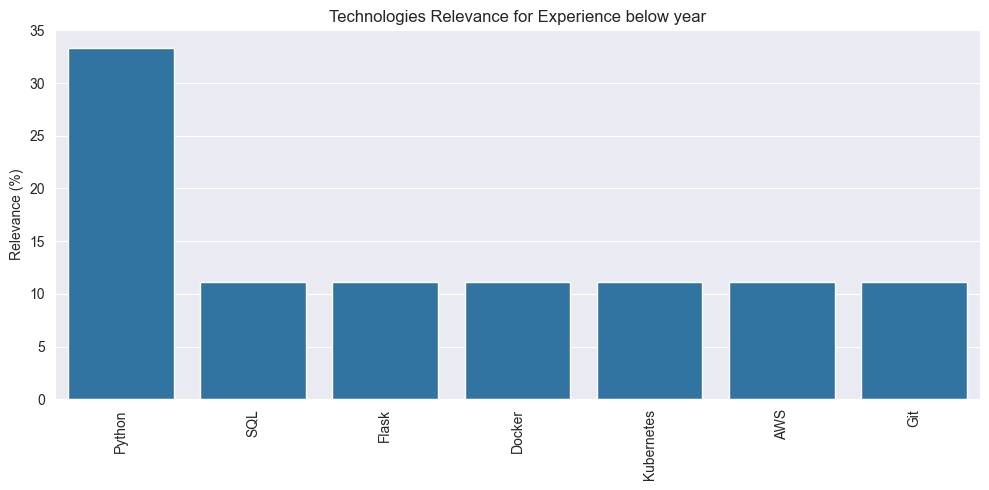

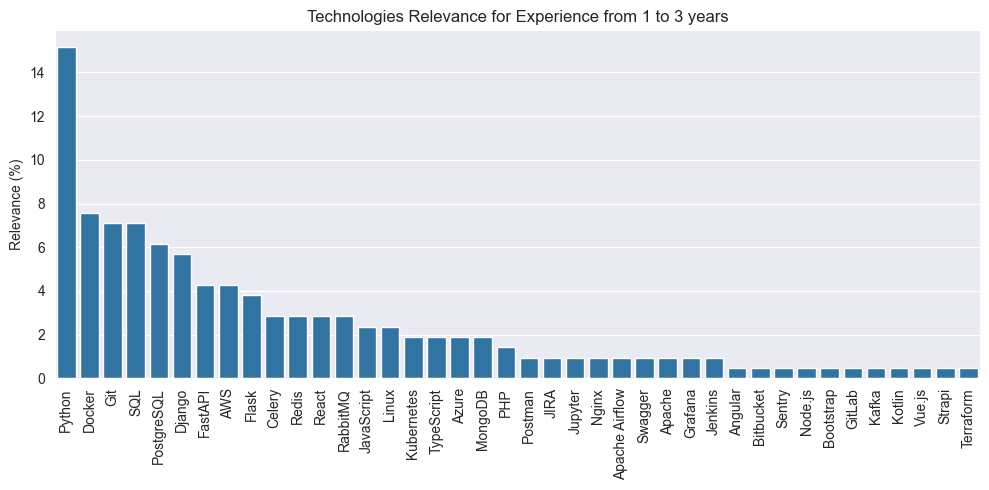

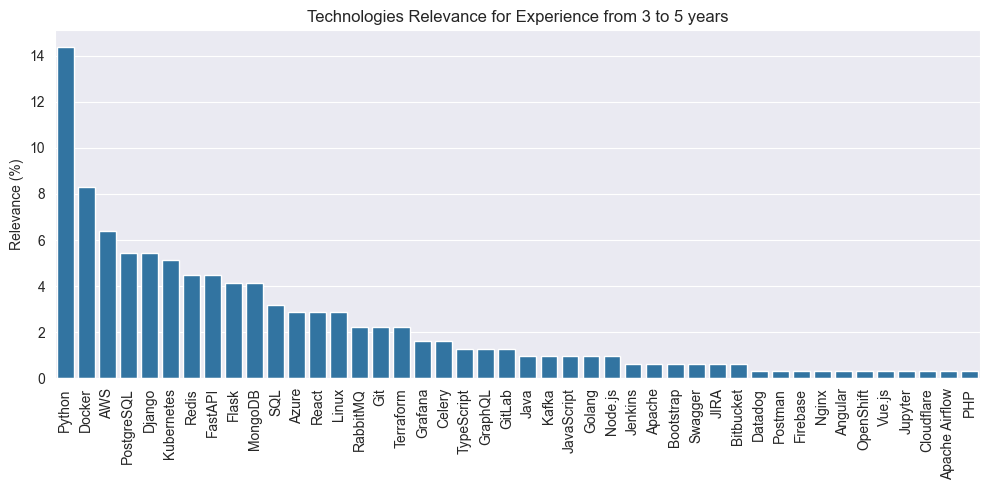

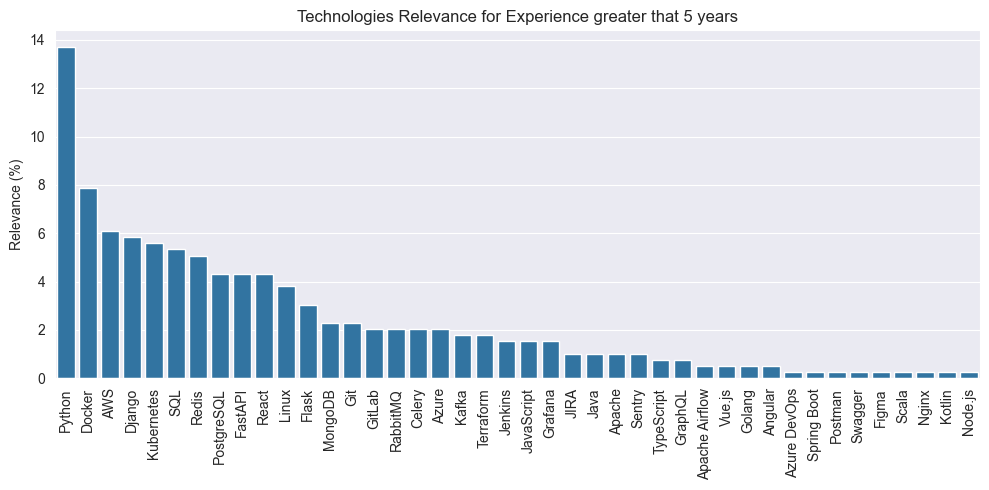

In [90]:
from pandas import DataFrame
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_technology_relevance(data: DataFrame, exp: str):
    plt.figure(figsize=(10, 5))
    sns.barplot(
        x="Technology", y="Percentage",
        data=data.sort_values(by="Percentage", ascending=False)
    )
    plt.xticks(rotation=90)
    plt.title(f"Technologies Relevance for Experience {exp}")
    plt.ylabel('Relevance (%)')
    plt.xlabel("")
    plt.tight_layout()
    plt.show()

df_technologies_exp = df_technologies.explode("Technologies")

for experience, group in df_technologies_exp.groupby(df_technologies_exp.index):
    tech_counter = group["Technologies"].value_counts()
    tech_data = pd.DataFrame({
        "Technology": tech_counter.index,
        "Count": tech_counter.values
    })
    
    tech_data["Percentage"] = (tech_data["Count"] / tech_data["Count"].sum()) * 100
    
    plot_technology_relevance(tech_data, experience)


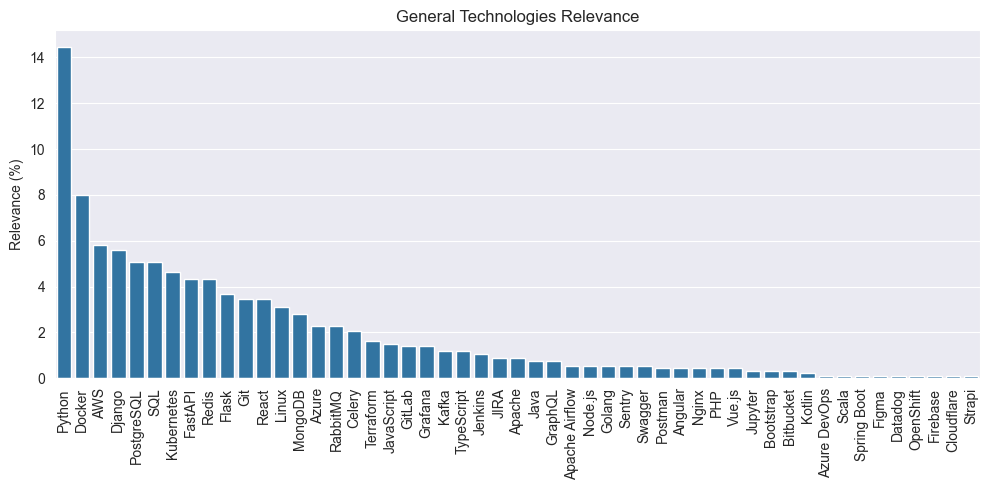

In [91]:
tech_series = df_technologies["Technologies"].explode()
tech_counter = tech_series.value_counts()

tech_data = pd.DataFrame({
    "Technology": tech_counter.index,
    "Count": tech_counter.values
})

tech_data["Percentage"] = tech_data["Count"] / tech_data["Count"].sum() * 100

plt.figure(figsize=(10, 5))
sns.barplot(
    x="Technology", y="Percentage", 
    data=tech_data.sort_values(by="Percentage", ascending=False)
)
plt.xticks(rotation=90)
plt.title("General Technologies Relevance")
plt.ylabel('Relevance (%)')
plt.xlabel("")
plt.tight_layout()
plt.show()